In [1]:
#The variables which are commented are to use the CPU instead of the GPU
#The os variable set in -1 will disable the GPU

#import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


#The threads variables are used to set the number of threads to be used when CPU test are needed

# Number of threads
#os.environ['TF_NUM_INTEROP_THREADS'] = '12'
#os.environ['TF_NUM_INTRAOP_THREADS'] = '12'

Num GPUs Available:  0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16546192665803286161
]


In [2]:
import time
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Read the datasets
train_data = pd.read_csv('UNSW_NB15_training-set.csv')
test_data = pd.read_csv('UNSW_NB15_testing-set.csv')

# 'attack_cat' is the label column
label_column = 'attack_cat'

# All other columns are feature columns
feature_columns = train_data.columns.tolist()
feature_columns.remove(label_column)

X_train = train_data[feature_columns]
y_train = train_data[label_column]
X_test = test_data[feature_columns]
y_test = test_data[label_column]

# Label Encoding for the categorical data
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# One-hot encoding for the categorical features
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Ensure the test data has the same columns as the training data
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Scale feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert target variable to one-hot encoded format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],))),
Dropout(0.5),
model.add(Dense(32, activation='relu')),
Dropout(0.5),
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using fit() as usual (no need to change this part)
start_time_multiclass = time.time()
model.fit(X_train, y_train, epochs=10, verbose=1)
end_time_multiclass = time.time()

# Calculate training time for multi-class classification
training_time_multiclass = end_time_multiclass - start_time_multiclass
print("Multi-Class Classification - Training Time:", training_time_multiclass, "seconds")

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.2f' % (accuracy * 100))


Epoch 1/10
2573/2573 [==============================] - 3s 953us/step - loss: 0.4206 - accuracy: 0.8562
Epoch 2/10
2573/2573 [==============================] - 2s 927us/step - loss: 0.3300 - accuracy: 0.8744
Epoch 3/10
2573/2573 [==============================] - 2s 843us/step - loss: 0.3155 - accuracy: 0.8772
Epoch 4/10
2573/2573 [==============================] - 2s 839us/step - loss: 0.3057 - accuracy: 0.8800
Epoch 5/10
2573/2573 [==============================] - 2s 849us/step - loss: 0.2992 - accuracy: 0.8821
Epoch 6/10
2573/2573 [==============================] - 2s 845us/step - loss: 0.2937 - accuracy: 0.8828
Epoch 7/10
2573/2573 [==============================] - 2s 851us/step - loss: 0.2876 - accuracy: 0.8855
Epoch 8/10
2573/2573 [==============================] - 2s 862us/step - loss: 0.2822 - accuracy: 0.8871
Epoch 9/10
2573/2573 [==============================] - 2s 860us/step - loss: 0.2784 - accuracy: 0.8879
Epoch 10/10
2573/2573 [==============================] - 2s 855u

In [3]:
from sklearn.metrics import classification_report

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_multiclass = y_pred.argmax(axis=1)  # Convert probabilities to predicted classes

# Convert one-hot encoded labels back to integers
y_test_int = y_test.argmax(axis=1)

# Generate and print the classification report
class_names = label_encoder.classes_
classification_report_str = classification_report(y_test_int, y_pred_multiclass, target_names=class_names)
print("Classification Report:\n", classification_report_str)

Classification Report:
                 precision    recall  f1-score   support

      Analysis       0.06      0.02      0.03      2000
      Backdoor       0.00      0.00      0.00      1746
           DoS       0.28      0.02      0.03     12264
      Exploits       0.60      0.70      0.65     33393
       Fuzzers       0.46      0.84      0.59     18184
       Generic       0.98      0.98      0.98     40000
        Normal       1.00      1.00      1.00     56000
Reconnaissance       0.78      0.38      0.51     10491
     Shellcode       0.61      0.09      0.15      1133
         Worms       0.64      0.05      0.10       130

      accuracy                           0.79    175341
     macro avg       0.54      0.41      0.40    175341
  weighted avg       0.77      0.79      0.76    175341



C:\Users\Erick\Documents\Maestria\Sem 3\Research Project\Models\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Erick\Documents\Maestria\Sem 3\Research Project\Models\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Erick\Documents\Maestria\Sem 3\Research Project\Models\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

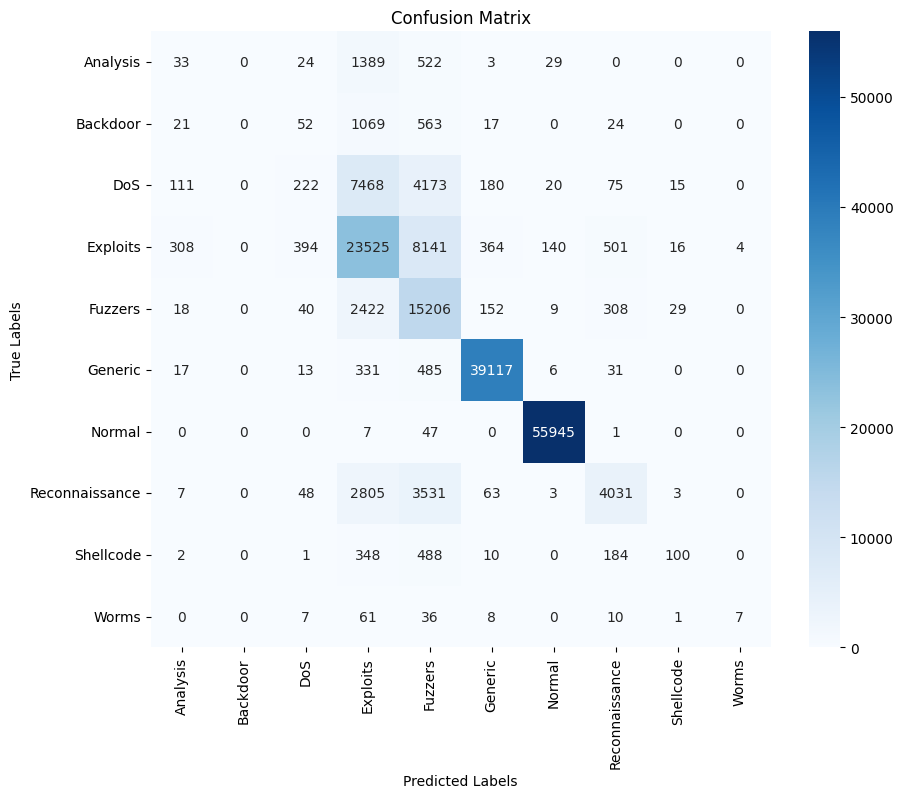

In [4]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary to map encoded labels to real class names
label_to_class_name = {i: class_names[i] for i in range(len(class_names))}

# Generate the confusion matrix
cm = confusion_matrix(y_test_int, y_pred_multiclass)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()